In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df1=pd.read_csv('NID_revised_cleanData.csv')
df1.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT,CT_Status,CT_Indicator,CT_Indicator_3
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226,With-in SLA,Green,Green
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226,With-in SLA,Green,Green
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226,With-in SLA,Green,Green
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C,91,With-in SLA,Green,Green
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E,117,With-in SLA,Green,Green


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Region          1593 non-null   object
 1   Metro           1593 non-null   object
 2   SiteType        1593 non-null   object
 3   DeploymentType  1593 non-null   object
 4   NIDPM           1593 non-null   object
 5   DPM             1593 non-null   object
 6   IsMainstream    1593 non-null   bool  
 7   FacilityCode    1593 non-null   object
 8   ClassType       1593 non-null   object
 9   CT              1593 non-null   int64 
 10  CT_Status       1593 non-null   object
 11  CT_Indicator    1593 non-null   object
 12  CT_Indicator_3  1593 non-null   object
dtypes: bool(1), int64(1), object(11)
memory usage: 151.0+ KB


In [4]:
df1['CT_Status'].value_counts()

Out-of SLA     891
With-in SLA    702
Name: CT_Status, dtype: int64

In [5]:
df1['CT_Status'].value_counts(normalize=True)*100

Out-of SLA     55.932203
With-in SLA    44.067797
Name: CT_Status, dtype: float64

<AxesSubplot:>

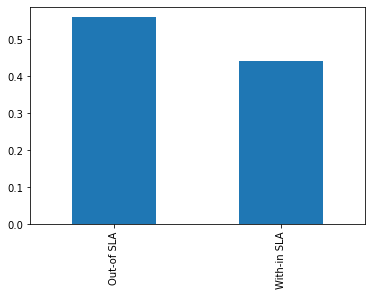

In [6]:
df1['CT_Status'].value_counts(normalize=True).plot.bar()

In [7]:
# Lets define predictors and Responce Varibale

x=df1.drop(['CT','CT_Indicator','CT_Status','CT_Indicator_3'],axis=1)
y=df1['CT_Status']

In [8]:
x.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E


In [10]:
le=LabelEncoder()

In [11]:
# Will have to convert the categorical varibles into Dummy variables. 
x_encoded=x.apply(le.fit_transform)

In [12]:
x_encoded.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType
0,0,64,2,5,15,12,0,211,0
1,0,64,2,5,15,12,0,211,0
2,0,64,2,5,15,12,0,211,0
3,0,36,5,1,16,32,0,170,2
4,1,109,4,17,6,46,0,379,4


In [14]:
value={'With-in SLA':1, 'Out-of SLA':0}
y.replace(value,inplace=True)

In [15]:
y.sample(10)

1568    1
242     0
110     0
378     0
668     0
990     1
311     1
83      1
1035    1
92      0
Name: CT_Status, dtype: int64

In [16]:
#Split the data into training and Testing
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_encoded,y,test_size=0.20,random_state=100,stratify=y)

In [17]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [26]:
rc=RandomForestClassifier()

In [27]:
rc_score=cross_val_score(rc,x_train,y_train,cv=5,scoring='accuracy')

In [28]:
print (rc_score)
print ("RandomForest Score:",np.round(rc_score.mean(),2))

[0.77254902 0.80784314 0.81960784 0.77254902 0.74409449]
RandomForest Score: 0.78


## Random Forest Classifier

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_lencoded= x.apply(le.fit_transform)

In [35]:
x_lencoded.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType
0,0,64,2,5,15,12,0,211,0
1,0,64,2,5,15,12,0,211,0
2,0,64,2,5,15,12,0,211,0
3,0,36,5,1,16,32,0,170,2
4,1,109,4,17,6,46,0,379,4


In [36]:
#Split the data into training and Testing
from sklearn.model_selection import train_test_split
x_train1,x_val1,y_train1,y_val1=train_test_split(x_lencoded,y,test_size=0.25,random_state=100)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [31]:
RF1 = RandomForestClassifier()
parameters = {
    'n_estimators': [10,50,100,200,300],
    'max_depth': [5,7,10,12,15,20,25,30,35,40,37]
}

cv = GridSearchCV(RF1, parameters, cv=3,n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)
print_results(cv)

Fitting 3 folds for each of 55 candidates, totalling 165 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s


BEST PARAMS: {'max_depth': 25, 'n_estimators': 50}

0.754 (+/-0.013) for {'max_depth': 5, 'n_estimators': 10}
0.765 (+/-0.044) for {'max_depth': 5, 'n_estimators': 50}
0.767 (+/-0.037) for {'max_depth': 5, 'n_estimators': 100}
0.76 (+/-0.035) for {'max_depth': 5, 'n_estimators': 200}
0.764 (+/-0.052) for {'max_depth': 5, 'n_estimators': 300}
0.772 (+/-0.028) for {'max_depth': 7, 'n_estimators': 10}
0.765 (+/-0.029) for {'max_depth': 7, 'n_estimators': 50}
0.766 (+/-0.042) for {'max_depth': 7, 'n_estimators': 100}
0.774 (+/-0.047) for {'max_depth': 7, 'n_estimators': 200}
0.765 (+/-0.047) for {'max_depth': 7, 'n_estimators': 300}
0.755 (+/-0.06) for {'max_depth': 10, 'n_estimators': 10}
0.773 (+/-0.048) for {'max_depth': 10, 'n_estimators': 50}
0.768 (+/-0.054) for {'max_depth': 10, 'n_estimators': 100}
0.777 (+/-0.04) for {'max_depth': 10, 'n_estimators': 200}
0.774 (+/-0.054) for {'max_depth': 10, 'n_estimators': 300}
0.752 (+/-0.054) for {'max_depth': 12, 'n_estimators': 10}
0.772 (+

[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   26.8s finished


In [32]:
rf=RandomForestClassifier(max_depth=25, n_estimators=50,class_weight='balanced')

In [33]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25, n_estimators=50)

In [34]:
prediction=rf.predict(x_val)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

  Out-of SLA       0.81      0.85      0.83       178
 With-in SLA       0.80      0.74      0.77       141

    accuracy                           0.80       319
   macro avg       0.80      0.80      0.80       319
weighted avg       0.80      0.80      0.80       319



In [38]:
print(confusion_matrix(y_val,prediction))

[[151  27]
 [ 36 105]]


In [39]:
importances=rf.feature_importances_

In [40]:
for feature in zip (x.columns, importances):
    print (feature)

('Region', 0.06914668201847868)
('Metro', 0.12472783820654353)
('SiteType', 0.09808858707989782)
('DeploymentType', 0.14978149106858937)
('NIDPM', 0.1241862949745535)
('DPM', 0.15710070209684013)
('IsMainstream', 0.008687121808343029)
('FacilityCode', 0.15712011033389764)
('ClassType', 0.1111611724128563)


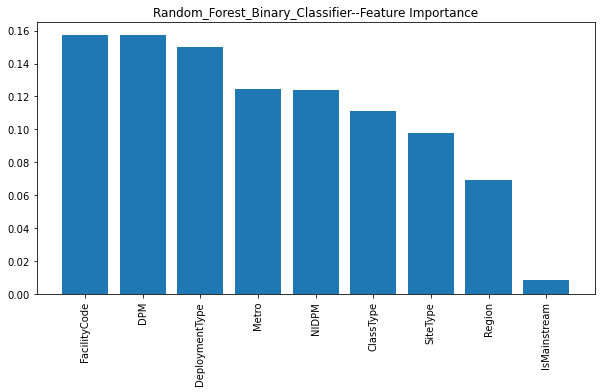

In [41]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10,5))

# Create plot title
plt.title("Random_Forest_Binary_Classifier--Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()